In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 16})

In [45]:
simulation_folder=              '../mag_test/results'

In [46]:
# mag_field_orientation=              'parallel'
mag_field_orientation=              'perpendicular'

susc_folder=                        '/susc1/'
# susc_folder=                        '/susc4/'

particle_number=3

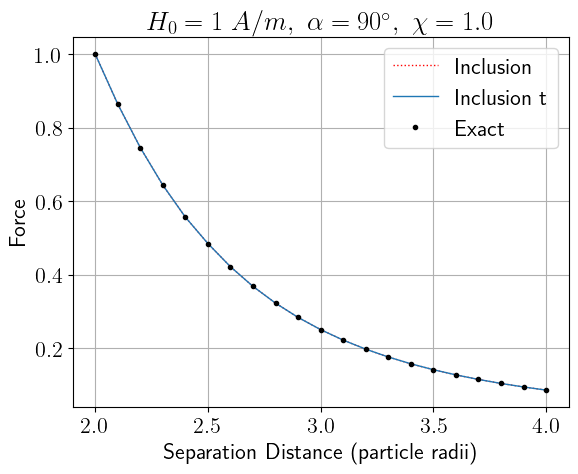

In [47]:
post_folder_MDM=                    '/MDM'
post_folder_SHA=                    '/SHA'
post_folder_inc=                    '/inclusion_quad'
post_folder_inct=                   'incl_non'

c=                  np.arange(20,41,1)
force_MDM=          np.zeros(c.size)
force_SHA=          np.zeros(c.size)
force_inc=          np.zeros(c.size)
force_inct=         np.zeros(c.size)
exact_force=        np.zeros(c.size)

if particle_number==2:
    post_folder_par=            '/post_par2'
    skip_rows=10
    
elif particle_number==3:
    post_folder_par=            '/post_par3'
    skip_rows=9

elif particle_number==4:
    post_folder_par=            '/post_par3_triangle'
    skip_rows=9
    
for i in range(c.size):
    sep_file=c[i]
    dump_folder=            simulation_folder + susc_folder + mag_field_orientation + post_folder_par 

    MDM_file_location=      (dump_folder + post_folder_MDM + f"/dump_{sep_file}_2.liggghts")
    force_MDM[i]=           np.loadtxt(MDM_file_location, skiprows=skip_rows, usecols=4)

    SHA_file_location=      (dump_folder + post_folder_SHA + f"/dump_{sep_file}_2.liggghts")
    force_SHA[i]=           np.loadtxt(SHA_file_location, skiprows=skip_rows, usecols=4)

    inc_file_location=      (dump_folder + post_folder_inc+ f"/dump_{sep_file}_2.liggghts")
    force_inc[i]=           np.loadtxt(inc_file_location, skiprows=skip_rows, usecols=4)

    inct_file_location=      (dump_folder + post_folder_inct+ f"/dump_{sep_file}_2.liggghts")
    force_inct[i]=           np.loadtxt(inc_file_location, skiprows=skip_rows, usecols=4)

    if particle_number==3:
        exact_file_location=    (dump_folder + 'SHA_20'+ f"/dump_{sep_file}_2.liggghts")
        exact_force[i]=         np.loadtxt(inc_file_location, skiprows=skip_rows, usecols=4)

if particle_number==2:
    exact_force_contact=force_inc[0]
    filesave_par_number="2par"
elif particle_number==3:
    exact_force_contact=exact_force[0]
    filesave_par_number="3par"

filesave_name=filesave_par_number + "_susc1_" + mag_field_orientation + ".png"

plt.figure()
# plt.plot(c/10, force_MDM/exact_force_contact, 'b-', label= 'MDM')
# plt.plot(c/10, force_SHA/exact_force_contact, 'g-.', linewidth=1.0, label= 'SHA')
plt.plot(c/10, force_inc/exact_force_contact, 'r:', linewidth=1.0,label= 'Inclusion')
plt.plot(c/10, force_inct/exact_force_contact, linewidth=1.0,label= 'Inclusion t')
if particle_number==3:
    plt.plot(c/10, exact_force/exact_force_contact, 'k.', linestyle='None', label='Exact')
plt.title(r"$H_0=1\ A/m,\ \alpha=90^\circ,\ \chi=1.0$")
plt.xlabel("Separation Distance (particle radii)")
plt.ylabel("Force")
plt.grid()
plt.legend()
plt.show()
# plt.savefig(filesave_name, format='png')

In [48]:

# mag_field_orientation=              '/perpendicular_plane'